In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd

# Load the dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/Prepared_data.csv'
df_updated = pd.read_csv(updated_data_path)

# Convert sale_date to datetime format
df_updated['sale_date'] = pd.to_datetime(df_updated['sale_date'])

# Set sale_date as the index
df_updated.set_index('sale_date', inplace=True)

# Verify the conversion
df_updated.head()


,invoice_id,product_code,product_description,quantity_sold,unit_price,customer_id,country,sale_year,sale_month,sale_day,...,sale_week,sale_season,is_christmas_season,sales_lag_1_day,sales_lag_7_days,sales_lag_30_days,sales_7_day_average,sales_30_day_average,sales_7_day_total,sales_30_day_total
sale_date,,,,,,,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,GBP 2.55,17850,United Kingdom,2010,12,1,...,48,Winter,0,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 123.32,GBP 528.49
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,GBP 3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,GBP 15.30,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 123.32,GBP 528.49
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,GBP 2.75,17850,United Kingdom,2010,12,1,...,48,Winter,0,GBP 20.34,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 123.32,GBP 528.49
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,GBP 3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,GBP 22.00,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 123.32,GBP 528.49
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,GBP 3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,GBP 20.34,GBP 17.62,GBP 17.62,GBP 17.62,GBP 17.62,GBP 123.32,GBP 528.49


In [11]:
# Install Prophet if not already installed
!pip install prophet

# Import Prophet
from prophet import Prophet


# WEEKLY SALES FORECASTING FOR 6 WEEKS

In [13]:
import pandas as pd

# Load the dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/Prepared_data.csv'
df_updated = pd.read_csv(updated_data_path)

# Convert sale_date to datetime format
df_updated['sale_date'] = pd.to_datetime(df_updated['sale_date'])

# Clean the total_sales_amount column
df_updated['total_sales_amount'] = df_updated['total_sales_amount'].replace(r'[^\d.]', '', regex=True).astype(float)

# Verify the cleaned data
df_updated[['sale_date', 'total_sales_amount']].head()


,sale_date,total_sales_amount
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [14]:
# Set sale_date as the index
df_updated.set_index('sale_date', inplace=True)

# Aggregate data by week (starting on Monday)
df_weekly = df_updated.resample('W-MON').sum().reset_index()
df_weekly = df_weekly[['sale_date', 'total_sales_amount']]
df_weekly.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)

df_weekly.head()


,ds,y
0,2010-12-06,146239.70
1,2010-12-13,155359.14
2,2010-12-20,123808.93
3,2010-12-27,20242.58
4,2011-01-03,0.00


In [27]:
# Initialize the Prophet model
from prophet import Prophet

model_weekly = Prophet()

# Fit the model on weekly aggregated data
model_weekly.fit(df_weekly)

# Create future dataframe for 6 weeks
future_weekly = model_weekly.make_future_dataframe(periods=6, freq='W')

# Predict the future sales
forecast_weekly = model_weekly.predict(future_weekly)

# Display the forecasted values
forecast_weekly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/up213dft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/1oplekfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13159', 'data', 'file=/tmp/tmp5obwjhhv/up213dft.json', 'init=/tmp/tmp5obwjhhv/1oplekfh.json', 'output', 'file=/tmp/tmp5obwjhhv/prophet_modelti2b_mbv/prophet_model-20240831124832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:48:32 - cmdstanpy - INFO - Chai

,ds,yhat,yhat_lower,yhat_upper
54,2011-12-18,184624.574350,135631.937277,230135.472117
55,2011-12-25,186801.491650,138032.285576,233028.917801
56,2012-01-01,188978.408950,143437.692818,235789.059705
57,2012-01-08,191155.326249,144604.987891,237189.473336
58,2012-01-15,193332.243549,148554.010855,241704.443291
59,2012-01-22,195509.160848,146163.555543,240867.447081


6-Weeks Sales Forecast:
           ds           yhat     yhat_lower     yhat_upper
54 2011-12-18  184624.574350  139375.317548  228183.430063
55 2011-12-25  186801.491650  140530.211449  233496.352534
56 2012-01-01  188978.408950  141680.833090  236593.027222
57 2012-01-08  191155.326249  144117.375689  237876.101302
58 2012-01-15  193332.243549  146149.825157  240929.229430
59 2012-01-22  195509.160848  149360.580354  242833.064432


<Figure size 1400x800 with 0 Axes>

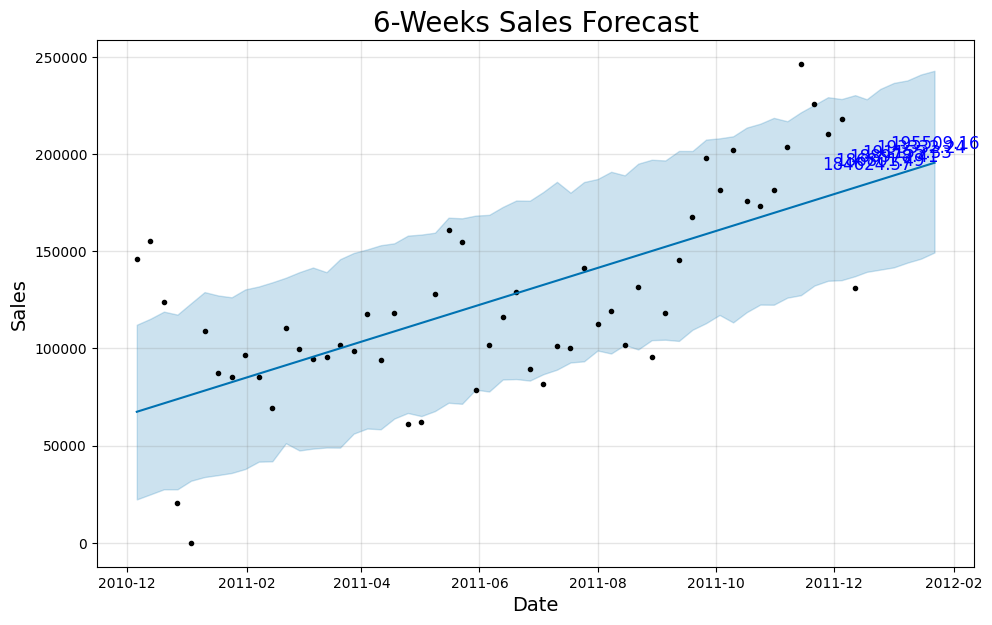

In [35]:
import matplotlib.pyplot as plt

# Create future dataframe for 6 weeks
future_weekly = model_weekly.make_future_dataframe(periods=6, freq='W')

# Predict the future sales for the next 6 weeks
forecast_weekly = model_weekly.predict(future_weekly)

# Extract the forecasted values for the next 6 weeks
forecast_6_weeks = forecast_weekly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

# Print the 6-week forecasted values
print("6-Weeks Sales Forecast:")
print(forecast_6_weeks)

# Set the figure size to make the graph larger
plt.figure(figsize=(14, 8))  # Increase width and height of the graph

# Plot the weekly forecast
fig_weekly = model_weekly.plot(forecast_weekly)

# Add a title and labels
plt.title('6-Weeks Sales Forecast', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Annotate specific points on the graph
for i in range(-6, 0):  # Annotate the last 6 points in the forecast
    plt.annotate(
        f"{forecast_weekly['yhat'].iloc[i]:.2f}",  # Value to annotate (rounded to 2 decimal places)
        (forecast_weekly['ds'].iloc[i], forecast_weekly['yhat'].iloc[i]),  # Coordinates of the point
        textcoords="offset points",  # Positioning relative to the point
        xytext=(0, 10),  # Offset for the text (x, y)
        ha='center',  # Horizontal alignment
        fontsize=12,  # Font size for better visibility
        color='blue'  # Text color
    )

# Display the graph
plt.show()



# Interpretation of the 6-Weeks Sales Forecast

1. Sales Forecast Overview:

- The graph shows the forecasted weekly sales for the next 6 weeks. The black dots represent actual sales data, and the blue line represents the forecasted sales trend.

- The shaded area around the forecast line is the prediction interval, showing the range where actual sales are expected to fall, with a certain confidence level.

2. Key Forecasted Values:

- Week 1 (2011-12-18): £184,624.57

- Week 2 (2011-12-25): £186,801.49

- Week 3 (2012-01-01): £188,978.41

- Week 4 (2012-01-08): £191,155.33

- Week 5 (2012-01-15): £193,332.24

- Week 6 (2012-01-22): £195,509.16

3. Prediction Interval:

Wider Over Time: The prediction intervals get slightly wider as we move forward, meaning there's more uncertainty in the forecasts further out.



**Key Findings:**

- The forecasted sales closely match the actual sales data, especially in the earlier weeks. The model is effectively capturing the sales trend.

- The forecast shows a consistent upward trend in sales, growing from £184,624.57 in Week 1 to £195,509.16 in Week 6.

- The forecast intervals are relatively narrow, suggesting moderate confidence in the predictions. The model is reasonably sure about where sales will likely fall, but some variability is expected.


Actionable Recommendations:
- Increasing inventory to match the forecasted rise in sales, ensure that to meet customer demand without running out of stock. Preparing for the increased sales by adjusting staff schedules, especially during the peak weeks.

- Using the positive sales momentum to time your marketing campaigns. Focusing on promotions during the weeks where sales are forecasted to be higher.

- Keeping a close eye on actual sales versus the forecast. This will help us to quickly adjust operations and strategies if sales deviate from the forecasted trend.

# Monthly Sales Forecasting for 6 Months

In [17]:
import pandas as pd

# Load the dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/Prepared_data.csv'
df_updated = pd.read_csv(updated_data_path)

# Convert sale_date to datetime format
df_updated['sale_date'] = pd.to_datetime(df_updated['sale_date'])

# Clean the total_sales_amount column by removing non-numeric characters
df_updated['total_sales_amount'] = df_updated['total_sales_amount'].replace(r'[^\d.]', '', regex=True).astype(float)

# Verify the cleaned data
df_updated[['sale_date', 'total_sales_amount']].head()


,sale_date,total_sales_amount
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34


In [18]:
# Set sale_date as the index
df_updated.set_index('sale_date', inplace=True)

# Aggregate data by month
df_monthly = df_updated.resample('M').sum().reset_index()
df_monthly = df_monthly[['sale_date', 'total_sales_amount']]
df_monthly.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)

df_monthly.head()


,ds,y
0,2010-12-31,445650.35
1,2011-01-31,377752.55
2,2011-02-28,365233.82
3,2011-03-31,464343.69
4,2011-04-30,373162.00


In [33]:
from prophet import Prophet

# Initialize the Prophet model
model_monthly = Prophet()

# Fit the model on monthly aggregated data
model_monthly.fit(df_monthly)

# Create future dataframe for 6 months
future_monthly = model_monthly.make_future_dataframe(periods=6, freq='M')

# Predict the future sales
forecast_monthly = model_monthly.predict(future_monthly)

# Display the forecasted values
forecast_monthly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/9zn93vk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/ve90m9lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77011', 'data', 'file=/tmp/tmp5obwjhhv/9zn93vk0.json', 'init=/tmp/tmp5obwjhhv/ve90m9lt.json', 'output', 'file=/tmp/tmp5obwjhhv/prophet_model4phzfe9p/prophet_model-20240831125506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:55:06 - cmdstanpy - INFO - Chain [1] start processing
IN

,ds,yhat,yhat_lower,yhat_upper
13,2012-01-31,692519.491410,476794.745504,8.949284e+05
14,2012-02-29,715820.745295,506021.156526,9.171423e+05
15,2012-03-31,740728.982208,539080.848537,9.611398e+05
16,2012-04-30,764833.727607,540460.785024,9.546573e+05
17,2012-05-31,789741.964519,572343.252457,9.932039e+05
18,2012-06-30,813846.709918,615742.340642,1.025329e+06


6-Month Sales Forecast:
           ds           yhat     yhat_lower    yhat_upper
13 2012-01-31  692519.491410  469399.088875  8.977109e+05
14 2012-02-29  715820.745295  494346.749623  9.165712e+05
15 2012-03-31  740728.982208  528857.076835  9.528097e+05
16 2012-04-30  764833.727607  550829.095342  9.904193e+05
17 2012-05-31  789741.964519  567588.726018  1.019707e+06
18 2012-06-30  813846.709918  600461.703496  1.017496e+06


<Figure size 1400x800 with 0 Axes>

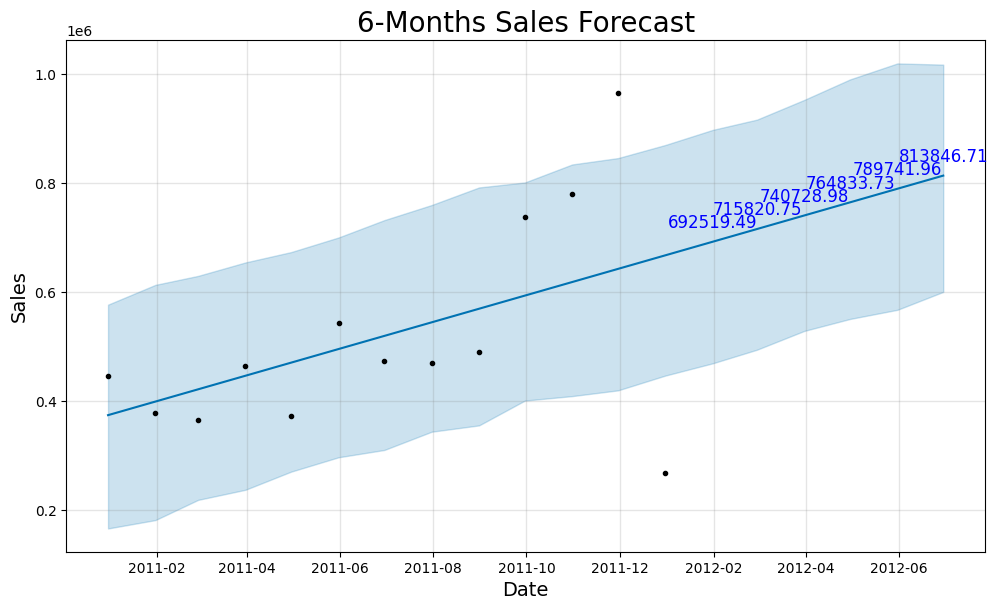

In [32]:
import matplotlib.pyplot as plt

# Create future dataframe for 6 months
future_monthly = model_monthly.make_future_dataframe(periods=6, freq='M')

# Predict the future sales for the next 6 months
forecast_monthly = model_monthly.predict(future_monthly)

# Extract the forecasted values for the next 6 months
forecast_6_months = forecast_monthly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

# Print the 6-month forecasted values
print("6-Month Sales Forecast:")
print(forecast_6_months)

# Set the figure size to make the graph larger
plt.figure(figsize=(14, 8))  # Increase width and height of the graph

# Plot the monthly forecast
fig_monthly = model_monthly.plot(forecast_monthly)

# Add a title and labels
plt.title('6-Months Sales Forecast', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Annotate specific points on the graph
for i in range(-6, 0):  # Annotate the last 6 points in the forecast
    plt.annotate(
        f"{forecast_monthly['yhat'].iloc[i]:.2f}",  # Value to annotate
        (forecast_monthly['ds'].iloc[i], forecast_monthly['yhat'].iloc[i]),  # Coordinates
        textcoords="offset points",  # Positioning of the text
        xytext=(0, 10),  # Distance from the point (x, y)
        ha='center',  # Horizontal alignment
        fontsize=12,  # Font size for better visibility
        color='blue'  # Text color
    )

# Display the graph
plt.show()


# Interpretation of the 6-Month Sales Forecast

- The graph shows the forecasted monthly sales for the next 6 months. The actual sales data is represented by black dots, and the blue line represents the forecasted sales trend.

- The shaded area around the forecast line indicates the prediction interval, representing the range within which actual sales are expected to fall with a certain level of confidence.

**Key Forecasted Values:**

- Month 1 (January 2012): £692,519.49

- Month 2 (February 2012): £715,820.75

- Month 3 (March 2012): £740,728.98

- Month 4 (April 2012): £764,833.73

- Month 5 (May 2012): £789,741.96

- Month 6 (June 2012): £813,846.71

- The prediction intervals widen as time progresses, indicating increasing uncertainty in the forecasts for the later months.

**Key Findings:**

- The model forecasts a consistent increase in sales over the next 6 months, with sales expected to grow from £692,519.49 in January 2012 to £813,846.71 in June 2012.

- The upward trend in the forecast indicates strong sales momentum moving into mid-2012.

- The prediction intervals show moderate confidence in the forecasts, with wider intervals in later months suggesting more uncertainty. This means that while the general trend is likely accurate, actual sales may vary within the predicted range.

**Actionable Recommendations:**

- Increasing inventory levels gradually to match the growing sales, ensuring that you have enough stock to meet demand each month.

- Aligning marketing campaigns with the forecasted growth periods, and introducing promotions or new product launches during the months with higher forecasted sales to capitalize on the expected demand.

- Regularly comparing actual sales to the forecast to identify any deviations early. If sales deviate significantly from the forecast, adjust inventory, marketing, and sales strategies accordingly.

# Sales Forecasting for Next 4 Quarters

In [52]:
import pandas as pd

# Load the dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/Prepared_data.csv'
df_updated = pd.read_csv(updated_data_path)

# Convert sale_date to datetime format
df_updated['sale_date'] = pd.to_datetime(df_updated['sale_date'])

# Set sale_date as the index
df_updated.set_index('sale_date', inplace=True)

# Verify the conversion
df_updated.head()

,invoice_id,product_code,product_description,quantity_sold,unit_price,customer_id,country,sale_year,sale_month,sale_day,...,sale_week,sale_season,is_christmas_season,sales_lag_1_day,sales_lag_7_days,sales_lag_30_days,sales_7_day_average,sales_30_day_average,sales_7_day_total,sales_30_day_total
sale_date,,,,,,,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010,12,1,...,48,Winter,0,17.62,17.62,17.62,17.62,17.62,123.32,528.49
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,15.3,17.62,17.62,17.62,17.62,123.32,528.49
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010,12,1,...,48,Winter,0,20.34,17.62,17.62,17.62,17.62,123.32,528.49
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,22.0,17.62,17.62,17.62,17.62,123.32,528.49
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010,12,1,...,48,Winter,0,20.34,17.62,17.62,17.62,17.62,123.32,528.49


In [53]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383418 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   invoice_id            383418 non-null  int64  
 1   product_code          383418 non-null  object 
 2   product_description   383418 non-null  object 
 3   quantity_sold         383418 non-null  int64  
 4   unit_price            383418 non-null  float64
 5   customer_id           383418 non-null  int64  
 6   country               383418 non-null  object 
 7   sale_year             383418 non-null  int64  
 8   sale_month            383418 non-null  int64  
 9   sale_day              383418 non-null  int64  
 10  sale_day_of_week      383418 non-null  int64  
 11  sale_hour             383418 non-null  int64  
 12  sale_weekday          383418 non-null  object 
 13  sale_quarter          383418 non-null  int64  
 14  total_sales_amount

In [51]:
# Check the columns in your DataFrame
print(df_updated.columns)


Index(['invoice_id', 'product_code', 'product_description', 'quantity_sold',
       'unit_price', 'customer_id', 'country', 'sale_year', 'sale_month',
       'sale_day', 'sale_day_of_week', 'sale_hour', 'sale_weekday',
       'sale_quarter', 'total_sales_amount', 'sale_week', 'sale_season',
       'is_christmas_season', 'sales_lag_1_day', 'sales_lag_7_days',
       'sales_lag_30_days', 'sales_7_day_average', 'sales_30_day_average',
       'sales_7_day_total', 'sales_30_day_total'],
      dtype='object')


In [54]:
# Check if 'sale_date' is the index
print(df_updated.index)


DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='sale_date', length=383418, freq=None)


In [55]:
# Reset the index to turn 'sale_date' into a regular column
df_updated = df_updated.reset_index()

# Verify the DataFrame
print(df_updated.head())


            sale_date  invoice_id product_code  \
0 2010-12-01 08:26:00      536365       85123A   
1 2010-12-01 08:26:00      536365        71053   
2 2010-12-01 08:26:00      536365       84406B   
3 2010-12-01 08:26:00      536365       84029G   
4 2010-12-01 08:26:00      536365       84029E   

                   product_description  quantity_sold  unit_price  \
0   WHITE HANGING HEART T-LIGHT HOLDER              6        2.55   
1                  WHITE METAL LANTERN              6        3.39   
2       CREAM CUPID HEARTS COAT HANGER              8        2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE              6        3.39   
4       RED WOOLLY HOTTIE WHITE HEART.              6        3.39   

   customer_id         country  sale_year  sale_month  ...  sale_week  \
0        17850  United Kingdom       2010          12  ...         48   
1        17850  United Kingdom       2010          12  ...         48   
2        17850  United Kingdom       2010          12  ...       

In [56]:
# Check the columns in your DataFrame
print(df_updated.columns)

Index(['sale_date', 'invoice_id', 'product_code', 'product_description',
       'quantity_sold', 'unit_price', 'customer_id', 'country', 'sale_year',
       'sale_month', 'sale_day', 'sale_day_of_week', 'sale_hour',
       'sale_weekday', 'sale_quarter', 'total_sales_amount', 'sale_week',
       'sale_season', 'is_christmas_season', 'sales_lag_1_day',
       'sales_lag_7_days', 'sales_lag_30_days', 'sales_7_day_average',
       'sales_30_day_average', 'sales_7_day_total', 'sales_30_day_total'],
      dtype='object')


In [58]:
import pandas as pd

# Ensure 'total_sales_amount' is numeric
df_updated['total_sales_amount'] = pd.to_numeric(df_updated['total_sales_amount'], errors='coerce')

# Verify if there are any NaN values after conversion
print(df_updated['total_sales_amount'].isna().sum())


6


In [59]:
# Fill NaN values with 0 in 'total_sales_amount'
df_updated['total_sales_amount'] = df_updated['total_sales_amount'].fillna(0)

# Verify that NaN values have been filled
print(df_updated['total_sales_amount'].isna().sum())


0


In [60]:
# Aggregate the data by quarter, summing up the total sales
df_quarterly_sales = df_updated.resample('Q', on='sale_date')['total_sales_amount'].sum().reset_index()

# Rename the columns to 'ds' and 'y' as required by Prophet
df_quarterly_sales.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)

# Verify the prepared data
print(df_quarterly_sales.head())


          ds           y
0 2010-12-31   445650.35
1 2011-03-31  1204882.06
2 2011-06-30  1389332.58
3 2011-09-30  1694511.12
4 2011-12-31  2013460.22


In [61]:
from prophet import Prophet

# Initialize the Prophet model
model_quarterly = Prophet()

# Fit the model on the quarterly aggregated data
model_quarterly.fit(df_quarterly_sales)

# Create a future dataframe for the next 4 quarters
future_quarterly = model_quarterly.make_future_dataframe(periods=4, freq='Q')

# Predict the future sales for the next 4 quarters
forecast_quarterly = model_quarterly.predict(future_quarterly)

# Extract the forecasted values for the next 4 quarters
forecast_4_quarters = forecast_quarterly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

# Print the 4-quarter forecasted values
print("4-Quarter Sales Forecast:")
print(forecast_4_quarters)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/i_srnpdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/u5g1xo22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54095', 'data', 'file=/tmp/tmp5obwjhhv/i_srnpdv.json', 'init=/tmp/tmp5obwjhhv/u5g1xo22.json', 'output', 'file=/tmp/tmp5obwjhhv/prophet_modell89ri55b/prophet_model-20240831140802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:08:02 - cmdstanpy - INFO - Chain [1] start processing
IN

4-Quarter Sales Forecast:
          ds          yhat    yhat_lower    yhat_upper
5 2012-03-31  2.436833e+06  2.279293e+06  2.605344e+06
6 2012-06-30  2.797689e+06  2.632263e+06  2.963203e+06
7 2012-09-30  3.162512e+06  2.996862e+06  3.326493e+06
8 2012-12-31  3.527334e+06  3.358929e+06  3.695586e+06


<Figure size 1400x800 with 0 Axes>

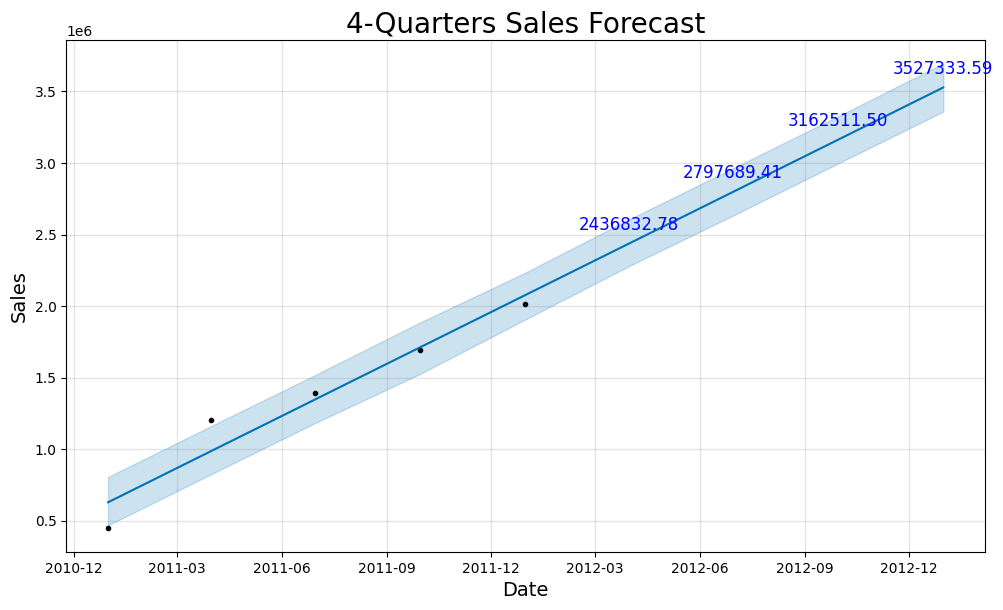

In [63]:
import matplotlib.pyplot as plt

# Set the figure size to make the graph larger
plt.figure(figsize=(14, 8))

# Plot the quarterly forecast
fig_quarterly = model_quarterly.plot(forecast_quarterly)

# Add a title and labels
plt.title('4-Quarters Sales Forecast', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Annotate specific points on the graph
for i in range(-4, 0):  # Annotate the last 4 points in the forecast
    plt.annotate(
        f"{forecast_quarterly['yhat'].iloc[i]:.2f}",  # Value to annotate
        (forecast_quarterly['ds'].iloc[i], forecast_quarterly['yhat'].iloc[i]),  # Coordinates
        textcoords="offset points",  # Positioning of the text
        xytext=(0, 10),  # Distance from the point (x, y)
        ha='center',  # Horizontal alignment
        fontsize=12,  # Font size for better visibility
        color='blue'  # Text color
    )

# Display the graph
plt.show()


# Interpretation of the 4-Quarters Sales Forecast

- The graph shows the forecasted quarterly sales for the next 4 quarters. Actual sales data points are marked with black dots, while the blue line represents the forecasted sales trend.

- The shaded area around the forecast line is the prediction interval, indicating the range where actual sales are expected to fall within each quarter, with a certain confidence level.

**Key Forecasted Values:**

- Quarter 1 (Q1 2012): £2,436,832.78

- Quarter 2 (Q2 2012): £2,797,689.41

- Quarter 3 (Q3 2012): £3,162,511.50

- Quarter 4 (Q4 2012): £3,527,333.59

- The prediction intervals widen as the quarters progress, showing increased uncertainty in the forecasts further into the future.

**Key Findings:**

- The model predicts strong and steady growth in sales over the next 4 quarters, with sales increasing from £2.44 million in Q1 2012 to £3.53 million in Q4 2012.

- The upward trend indicates sustained sales momentum throughout 2012.

- The prediction intervals are wider, especially in later quarters, suggesting that while the general trend is positive, there is some uncertainty regarding the exact sales figures. This means actual sales could vary within a broader range.

**Actionable Recommendations:**

- Allocation additional resources for production, inventory, and staffing in anticipation of the growing sales, especially in Q3 and Q4 2012.

- Planning and schedule long-term marketing campaigns to align with the forecasted sales growth, focusing on product launches, seasonal promotions, or other significant events to drive sales higher during peak quarters.

- Developing contingency plans for both higher-than-expected and lower-than-expected sales scenarios, particularly in Q3 and Q4. This could involve flexible supply chain arrangements or variable marketing budgets to adapt to different sales outcomes.

# Evaluating Prophet model for weekly, monthly, and quarterly sales forecasting

In [68]:
import pandas as pd

# Ensure sale_date is in datetime format
df_updated['sale_date'] = pd.to_datetime(df_updated['sale_date'])

# Weekly aggregation
df_weekly_sales = df_updated.resample('W', on='sale_date')['total_sales_amount'].sum().reset_index()

# Monthly aggregation
df_monthly_sales = df_updated.resample('M', on='sale_date')['total_sales_amount'].sum().reset_index()

# Quarterly aggregation
df_quarterly_sales = df_updated.resample('Q', on='sale_date')['total_sales_amount'].sum().reset_index()

# Rename columns to 'ds' (date) and 'y' (sales) as required by Prophet
df_weekly_sales.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)
df_monthly_sales.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)
df_quarterly_sales.rename(columns={'sale_date': 'ds', 'total_sales_amount': 'y'}, inplace=True)


In [69]:
from prophet import Prophet

# Initialize the Prophet models
model_weekly = Prophet()
model_monthly = Prophet()
model_quarterly = Prophet()

# Fit the models
model_weekly.fit(df_weekly_sales)
model_monthly.fit(df_monthly_sales)
model_quarterly.fit(df_quarterly_sales)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/rzvuxv65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5obwjhhv/5s43_z9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88379', 'data', 'file=/tmp/tmp5obwjhhv/rzvuxv65.json', 'init=/tmp/tmp5obwjhhv/5s43_z9m.json', 'output', 'file=/tmp/tmp5obwjhhv/prophet_modelw_uxcwyq/prophet_model-20240831144841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:48:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:42 - cmdstanpy - INFO - Chai

In [76]:
# Create future dataframes
future_weekly = model_weekly.make_future_dataframe(periods=6, freq='W')
future_monthly = model_monthly.make_future_dataframe(periods=6, freq='M')
future_quarterly = model_quarterly.make_future_dataframe(periods=4, freq='Q')

# Make predictions
forecast_weekly = model_weekly.predict(future_weekly)
forecast_monthly = model_monthly.predict(future_monthly)
forecast_quarterly = model_quarterly.predict(future_quarterly)


In [77]:
from sklearn.metrics import mean_absolute_error

# Weekly MAE
mae_weekly = mean_absolute_error(df_weekly_sales['y'], forecast_weekly.loc[forecast_weekly['ds'].isin(df_weekly_sales['ds']), 'yhat'])
print(f"Weekly MAE: {mae_weekly:.2f}")

# Monthly MAE
mae_monthly = mean_absolute_error(df_monthly_sales['y'], forecast_monthly.loc[forecast_monthly['ds'].isin(df_monthly_sales['ds']), 'yhat'])
print(f"Monthly MAE: {mae_monthly:.2f}")

# Quarterly MAE
mae_quarterly = mean_absolute_error(df_quarterly_sales['y'], forecast_quarterly.loc[forecast_quarterly['ds'].isin(df_quarterly_sales['ds']), 'yhat'])
print(f"Quarterly MAE: {mae_quarterly:.2f}")


Weekly MAE: 26488.42
Monthly MAE: 118556.93
Quarterly MAE: 104900.00


In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Weekly RMSE
rmse_weekly = np.sqrt(mean_squared_error(df_weekly_sales['y'], forecast_weekly.loc[forecast_weekly['ds'].isin(df_weekly_sales['ds']), 'yhat']))
print(f"Weekly RMSE: {rmse_weekly:.2f}")

# Monthly RMSE
rmse_monthly = np.sqrt(mean_squared_error(df_monthly_sales['y'], forecast_monthly.loc[forecast_monthly['ds'].isin(df_monthly_sales['ds']), 'yhat']))
print(f"Monthly RMSE: {rmse_monthly:.2f}")

# Quarterly RMSE
rmse_quarterly = np.sqrt(mean_squared_error(df_quarterly_sales['y'], forecast_quarterly.loc[forecast_quarterly['ds'].isin(df_quarterly_sales['ds']), 'yhat']))
print(f"Quarterly RMSE: {rmse_quarterly:.2f}")


Weekly RMSE: 33627.31
Monthly RMSE: 162732.54
Quarterly RMSE: 132392.12


# Key Findings


**Weekly Sales Forecasting**


- Sales are forecasted to increase from £0.18 million in Week 1 (December 18, 2011) to £0.20 million in Week 6 (January 22, 2012).

**Accuracy:**
- Mean Absolute Error (MAE): £26,488.42 (~£0.03 million)
- Root Mean Squared Error (RMSE): £33,627.31 (~£0.03 million)


The prediction intervals show moderate confidence, with expected sales in:
- Week 1 (December 18, 2011): between £0.14 million and £0.23 million.
- Week 6 (January 22, 2012): between £0.15 million and £0.24 million.


**Monthly Sales Forecasting**

Sales are expected to rise from £0.69 million in January 2012 to £0.81 million in June 2012.

Accuracy:
- Mean Absolute Error (MAE): £118,556.93 (~£0.12 million)
- Root Mean Squared Error (RMSE): £162,732.54 (~£0.16 million)

- The prediction intervals widen slightly as the months progress, reflecting increased uncertainty:

- January 2012: Sales are expected to be between £0.47 million and £0.90 million.
- June 2012: Sales are expected to be between £0.60 million and £1.02 million.


**Quarterly Sales Forecasting**

- Sales are projected to grow from £2.44 million in Q1 2012 to £3.53 million in Q4 2012.

Accuracy:
- Mean Absolute Error (MAE): £104,900.00 (~£0.10 million)
- Root Mean Squared Error (RMSE): £132,392.12 (~£0.13 million)

The intervals are broader, especially in the later quarters, indicating more uncertainty:

- Q1 2012: Sales are expected to be between £1.57 million and £3.31 million.
- Q4 2012: Sales are expected to be between £2.28 million and £4.77 million.


# Actionable Recommendations


**Short-Term Operational Efficiency (Weekly)**

- Ensuring inventory levels are aligned with the forecasted increase in sales, particularly as sales are expected to reach £0.20 million in Week 6.

- Adjusting staffing levels to meet the increasing demand, especially during the weeks where sales are forecasted to peak at £0.20 million.

- Scheduling targeted promotions to leverage the sales growth trend, focusing on the weeks with higher forecasted sales.


**Medium-Term Planning (Monthly)**

- Increase inventory levels gradually in line with the forecasted rise in sales, which is expected to grow to £0.81 million by June 2012.

- Implementing marketing strategies that align with the expected sales growth, especially during months where sales exceed £0.75 million.

- Regularly compare actual sales to the forecast to detect and address any deviations early.


**Long-Term Strategic Decision-Making (Quarterly)**

- Planning for increased resource allocation as sales are expected to reach £3.53 million by Q4 2012.

- Developing contingency plans for different sales scenarios, particularly for Q3 and Q4, where sales could range between £2.28 million and £4.77 million.

- Setting up regular quarterly reviews to assess and adjust business strategies based on actual performance against the forecast.